In [9]:
import pandas as pd 
import numpy as np


df = pd.read_csv('~/Downloads/Auto.csv')
df = df[df['horsepower'] != '?']
df['horsepower'] = df['horsepower'].astype(float)
df['muscle'] = df['horsepower'].apply(
    lambda x: x > np.mean(df['horsepower'])
)

train_length = int(len(df) * 0.8)
train = df[:train_length]
test = df[train_length:]

/Users/esten/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


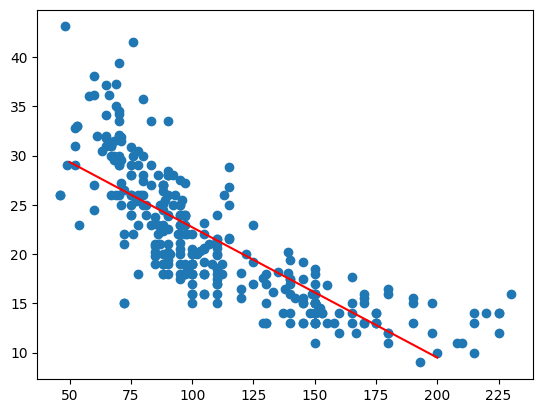

6.931096364471544

In [21]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


model = LinearRegression()
model.fit(train[['horsepower']], train['mpg'])

predictions = model.predict(test[['horsepower']])
plt.scatter(train['horsepower'], train['mpg'])
x = np.asarray([50, 200])
plt.plot(x, model.predict(np.reshape(x, (2, 1))), c='red')
plt.show()

from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions, test['mpg'])

In [23]:
model = LinearRegression()
model.fit(train[['horsepower', 'weight', 'displacement', 'year']], train['mpg'])

predictions = model.predict(test[['horsepower', 'weight', 'displacement', 'year']])

mean_absolute_error(predictions, test['mpg'])

4.245480866670082

In [25]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(train[['weight', 'displacement', 'year']], train['muscle'])

predictions = model.predict(test[['weight', 'displacement', 'year']])

from sklearn.metrics import accuracy_score

accuracy_score(test['muscle'], predictions)

0.8860759493670886